<h1>MONTE CARLO SIMULATION FOR OPTION PRICING VS BLACK SCHOLES FORMULA.</h1>    
Pricing an option is not a trivial task. If the options are over or underpriced, arbitrage opportunities may arise.<br>
Prices of stocks have stochastic behaviour. In this case, prices are geometric brownian motions:<br>   

𝑑𝑆𝑡 = 𝑟 𝑆𝑡 𝑑𝑡 + 𝜎𝑆𝑡 𝑑𝑊𝑡

Solving the equation using Itôs Lemma, we obtain the the formula for the stock price.

Monte Carlo simulation simulates a number of different possible stocks price paths to get the payoff vector of the option. This payoff is the maximum between the stock price minus the strike price and cero for a call option. <br>

The Fundamental Theorem of Asset Pricing states that in an arbitrage-free market there is an equivalent martingale measure under which discounted asset prices are martingales. This measure is where prices grow at the risk free rate. Due to this theorem, the option price is the discounted mean value of the payoff.<br>

The Black Scholes Formula assumes that the stock returns have normal distribution and that the volatility is constant. we use:<br>
$S_t = S_0 e ^ {(r- \frac{\sigma ^2}{2} )t + \sigma W_t)}$

Then, the price of the call is:<br>
$C_r = S_t N(d1) - ke^{-r(T-t)}N(d2)$ <br><br>
$d1 = \frac{ln(\frac{S_t}{K}) + (r+\frac{\sigma^2}{2}(T-t))}{\sigma \sqrt{T-t}}$ <br><br>
$d2 = d1 - \sigma\sqrt{T-t}$


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

In [42]:
#Variables
T = 252 #Trading days
n_steps = 1/ T 
r = 0.05 #risk free rate as effective rate
r_c = np.log(1+r) #risk free rate as a compounded rate
sigma = 0.2 #Standard deviation must be annual
stock_0 = 100 #Initial price of the stock
strike_p = 100 #The option is at the money
n_paths = 3000 #Number of paths we are going to simulate

In [63]:
def simulate_stock_price (r_c, sigma, S0, n_steps, T): 
    Z = np.random.normal(0, 1, size=T) #Generate a random variable with N(0,1)
    
    stock_price = np.empty(T+1) #Empty array of size t
    stock_price[0] = S0 #Add the initial value of the stock to the array
    
    drift = (r_c - (0.5 * (sigma**2))) * n_steps # define the drift 
    
    diffusion = sigma * np.sqrt(n_steps) #define the diffusion
    
    
    for i in range (1,T+1): #Create the future paths
        stock_price[i] = stock_price[i-1] * np.exp(drift + (diffusion * Z[i-1]) )
    return stock_price

def Monte_Carlo(n_paths, r_c, sigma, S0, T, n_steps):
    paths = np.empty((n_paths, T+1)) #Matrix m-path x time, this will save all the paths we simulate
    for j in range (0,n_paths):
        paths[j,:] = simulate_stock_price(r_c, sigma, S0,  n_steps,T)
    return paths

def Pricing (s_price, strike, r_c, T,n_steps):
    ST = s_price[:, -1] #We take the last prices of all the paths 
    payoff = np.maximum(ST- strike, 0.0) #We calculate the payoff, in this case is for a call option
    disc = np.exp(-r_c * T*n_steps)
    
    call_price = disc * payoff.mean() #Calculate the price of the call
    return call_price

def Black_Scholes(s_price_0, strike, r_c,sigma, T, n_steps,):
    d1 = ( np.log((s_price_0)/(strike)) + ((r_c + ((sigma**2)/2)) *(T*n_steps))) / (sigma* ((T*n_steps)**0.5))
    d2 = d1 - (sigma * ((T*n_steps)**0.5))
    call = (s_price_0 * sc.norm.cdf(d1)) - (strike * np.exp(-r_c*(T*n_steps)) * sc.norm.cdf(d2))
    
    return call

In [64]:
MCS = Monte_Carlo(n_paths, r_c, sigma, stock_0, T, n_steps)


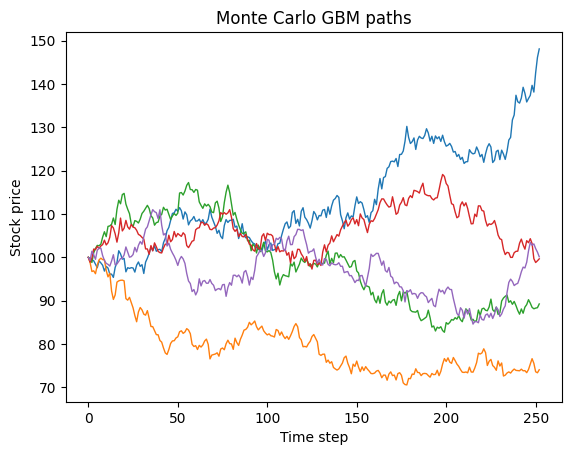

In [65]:
n_plot = 5
idx = np.random.choice(MCS.shape[0], n_plot, replace = "False")

for i in idx:
    plt.plot(MCS[i], lw=1)

plt.xlabel("Time step")
plt.ylabel("Stock price")
plt.title("Monte Carlo GBM paths")
plt.show()

In [66]:
call = Pricing(MCS,strike_p,r_c,T,n_steps)
call_BS = Black_Scholes(stock_0,strike_p,r_c,sigma,T,n_steps)

print(call, call_BS)

10.02761493763904 10.386279496719524
